# Exploration
Explore the data that you have scraped. Here are some ideas for exploration:

In [1]:
import re
import pandas as pd
import nltk
from prepare import prepare_data

In [2]:
df= prepare_data()
df.head()

,repo,language,readme_contents
1,rdpeng/ProgrammingAssignment2,R,introduction second programming assignment req...
2,octocat/Spoon-Knife,HTML,well hello repository meant provide example fo...
3,tensorflow/tensorflow,C++,div aligncenter img srchttpswwwtensorfloworgim...
4,SmartThingsCommunity/SmartThingsPublic,Groovy,smartthings public github repo official list s...
5,twbs/bootstrap,JavaScript,p aligncenter hrefhttpsgetbootstrapcom img src...


## 1. quantify the data frame

### Check distribution of languages

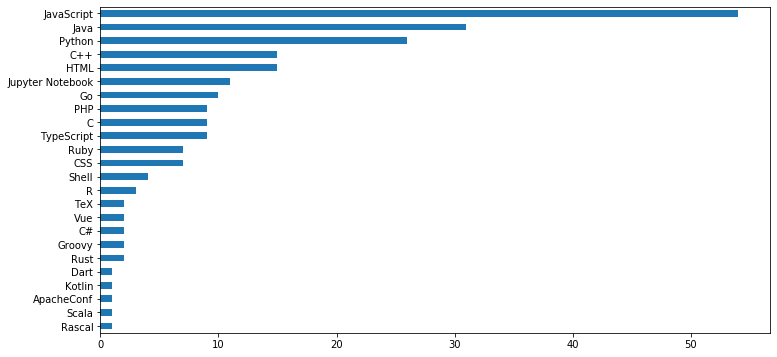

In [5]:
df.language.value_counts(ascending=True).plot.barh(figsize = (12,6))

In [10]:
language = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
language.columns = ['occurance', 'percentage']
language.head(10)

,occurance,percentage
JavaScript,54,0.240000
Java,31,0.137778
Python,26,0.115556
C++,15,0.066667
HTML,15,0.066667
Jupyter Notebook,11,0.048889
Go,10,0.044444
PHP,9,0.040000
C,9,0.040000
TypeScript,9,0.040000


## 2. Expolore some questions

### 1. What are the most common words in READMEs?

In [ ]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [18]:
all_words = (' '.join(df.readme_contents)).split()
all_words[:10]

['introduction',
 'second',
 'programming',
 'assignment',
 'require',
 'write',
 'r',
 'function',
 'able',
 'cache']

In [26]:
all_words_freq = pd.Series(all_words).value_counts(ascending=True)
all_words_freq.tail()

file        832
use         916
library    1010
go         1075
'          3165
dtype: int64

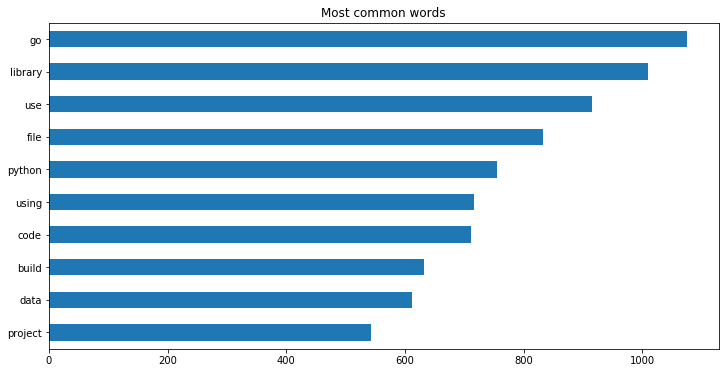

In [27]:
all_words_freq[-11:-1].plot.barh(figsize = (12,6), title='Most common words')

**Answer**: So the most common word is 'go'

### 2. What does the distribution of IDFs look like for the most common words?

### 3. Does the length of the README vary by programming language?

In [33]:
df['length_of_readme'] = df.readme_contents.apply(len)
df.head()

,repo,language,readme_contents,length_of_readme
1,rdpeng/ProgrammingAssignment2,R,introduction second programming assignment req...,2500
2,octocat/Spoon-Knife,HTML,well hello repository meant provide example fo...,524
3,tensorflow/tensorflow,C++,div aligncenter img srchttpswwwtensorfloworgim...,8749
4,SmartThingsCommunity/SmartThingsPublic,Groovy,smartthings public github repo official list s...,425
5,twbs/bootstrap,JavaScript,p aligncenter hrefhttpsgetbootstrapcom img src...,8951


**Hypothesis Test**

- H0: There is no difference in the length of readme for those whose is python and those whose language is java  
- H1: There is adifference in the length of readme for those whose is python and those whose language is java

Confidence interval = 0.05

In [38]:
x1 = df[df.language == 'Python'].length_of_readme
x2 = df[df.language == 'Java'].length_of_readme

In [40]:
from scipy import stats
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=2.5640779291870692, pvalue=0.013106824346137459)

**Conclusion**: Because p < CI, so we reject HO hypothesis, and there is a difference in the length of readme file between python and java.

### 4. Do different programming languages use a different number of unique words?